# Programming for Data Analytics - Homework Four

Name : Samalie Piwan   
AndrewID : spiwan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

### PART A

**1) Download the dataset files, load them, and prepare the dataset for analysis**

**Data Cleaning**

Load the data into pandas dataframes

In [2]:
# Load all the file names into a list
filenames = []
file_directory = 'MachineLearningCVE'
for filename in os.listdir(file_directory):
    filenames.append(file_directory+"\\"+filename)

# Load the data in the files into a pandas dataframe
cids_df = pd.concat(map(pd.read_csv, filenames), ignore_index=True)
cids_df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,54925,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,9282,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,55153,4,2,0,37,0,31,6,18.5,17.67767,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**Data Cleaning**

Infinte data

In [3]:
# Check for columns with infinite data in the independent columns
cids_df_X = cids_df.iloc[:,:-1]
cids_df_X.columns[np.isinf(cids_df_X).any()]

Index(['Flow Bytes/s', ' Flow Packets/s'], dtype='object')

In [4]:
# Get the mean value for both columns
flow_bytes_mean = cids_df_X['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan).mean()
flow_pkt_mean = cids_df_X[' Flow Packets/s'].replace([np.inf, -np.inf], np.nan).mean()

In [5]:
# Replace the infinite value with the mean value
cids_df['Flow Bytes/s'] = cids_df['Flow Bytes/s'].replace([np.inf, -np.inf], flow_bytes_mean)
cids_df[' Flow Packets/s'] = cids_df[' Flow Packets/s'].replace([np.inf, -np.inf], flow_pkt_mean)

Null Values

In [6]:
# Check for null values
null_values = cids_df.isnull().sum()
null_values[null_values > 0]

Flow Bytes/s    1358
dtype: int64

In [7]:
# Handle the null values in the 'Flow Bytes/s' column using imputation with the mean
cids_df['Flow Bytes/s'] = cids_df['Flow Bytes/s'].fillna(cids_df['Flow Bytes/s'].mean())

# Check if NaN values still exist
null_values_clean = cids_df.isnull().sum()
null_values_clean[null_values_clean > 0]

Series([], dtype: int64)

Columns with no variance

In [8]:
# Check for columns where data has no variance i.e the values is always 0
var_values = cids_df.var(numeric_only = True)
zero_var_values = var_values[var_values == 0]
zero_var_values

 Bwd PSH Flags           0.0
 Bwd URG Flags           0.0
Fwd Avg Bytes/Bulk       0.0
 Fwd Avg Packets/Bulk    0.0
 Fwd Avg Bulk Rate       0.0
 Bwd Avg Bytes/Bulk      0.0
 Bwd Avg Packets/Bulk    0.0
Bwd Avg Bulk Rate        0.0
dtype: float64

We observe that there are 8 columns with variance as 0, meaning they have all values as 0. These can be dropped as the values are always constant and we do not gain information from them.

In [9]:
# Check the number of columns before dropping the data
len(cids_df.columns)

79

In [10]:
zero_var_cols = list(zero_var_values.index)
cids_df = cids_df.drop(columns = zero_var_cols)

# Check the number of columns after dropping the data
len(cids_df.columns)

71

#### 2) Perform four (4) data exploration tasks. Include markdown cells to comment on the insights from the data exploration.

In [11]:
# Check the shape
cids_df.shape

(2830743, 71)

The resulting dataframe is quite large, with 2,830,743 rows and 79 columns

In [12]:
# Check the dataframe information
cids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 71 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

The dataframe contains mainly float and integer data, except the 'Label' column which contains an object

In [13]:
# Check the statistics of the data
cids_df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


From the data description, the data generally has data within a wide range of values. Some columns have data within thousands while others have data within tens and ones. This will need to be scaled to normalize the values

In [32]:
# Get the distribution of the labels
label_counts = cids_df[" Label"].value_counts()
label_counts

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

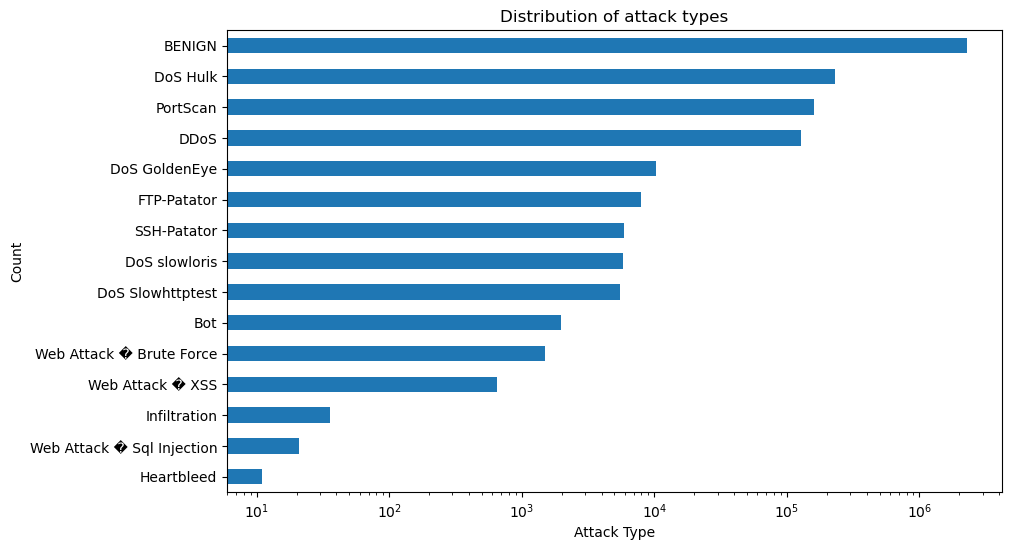

In [34]:
# Plot the distribution of the attack types
plt.figure(figsize = (10,6))
cids_df[" Label"].value_counts().sort_values().plot(kind="barh")
plt.xscale(value = "log")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of attack types")
plt.show()

From the above, we can see that there are 15 unique types intrusion security attacks, with 'Benign' attacks being the most frequent occurence in our dataset.

#### 3) Perform pre-processing on the data using scaling and label encoding as appropriate.

In [16]:
# Initialize the scaler
scaler = StandardScaler()
# Select the independent variables
X = cids_df.iloc[:,:-1]
# Scale the independent variables
X = scaler.fit_transform(X)

Transform the labels

In [17]:
# Create the label encoder
label_encoder = LabelEncoder()
# Fit and transform the current labels to a value
cids_df['Label Enc'] = label_encoder.fit_transform(cids_df[' Label'])
# Check the label encoded column
cids_df[[' Label', 'Label Enc']].head()

,Label,Label Enc
0,BENIGN,0
1,BENIGN,0
2,BENIGN,0
3,BENIGN,0
4,BENIGN,0


In [18]:
# Set the encoded labels as the Y data
y = cids_df['Label Enc']

### PART B

#### 4) Using scikit-learn, create models based on three different machine learning algorithms and compare their performance. For uniformity, the algorithms to consider are Random Forest, logistic regression, and support vector machines.

#### a) Compare the performance of each algorithm based on three metrics, i.e., recall, and precision, f1-score using 10-fold cross-validation.

Set the number of folds for all cross-validation

In [19]:
cv_folds = 10

Random Forest Setup

In [ ]:
# Set the number of estimators for the Random Forest Classifier
rf_n_estimators = 30

rfClassifier = RandomForestClassifier(rf_n_estimators)
rf_recall_scores = cross_val_score(rfClassifier, X, y, cv = cv_folds, scoring="recall_micro")

In [ ]:
print("Random Forest Classifier Initial Cross Validation Recall Scores: ")
rf_recall_scores

In [ ]:
print(f"Average Random Forest Classifier Initial Cross Validation Recall Score is {rf_recall_scores.mean()}")

In [ ]:
print("Random Forest Classifier Initial Cross Validation Precision Scores: ")
rf_precision_scores

In [ ]:
print("Random Forest Classifier Initial Cross Validation F1 Scores: ")
rf_f1_scores